In [97]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import sys
from pathlib import Path

PROJECT_ROOT = Path(os.getcwd()).resolve().parents[0]
# Add project root to the Python path
sys.path.append(str(PROJECT_ROOT))

from fogas import PolicySolver,FOGASSolver, FOGASEvaluator, FOGASHyperOptimizer, FOGASOracleSolver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
states_2d = np.array([0, 1])
actions_2d = np.array([0, 1])
gamma_2d = 0.9
x_0 = 0 # fixed initial state

def phi(state, action):
    vec = np.zeros(4)
    vec[state * 2 + action] = 1.0
    return vec

omega = np.array([0, 1.0, 1.0, 2.0])

psi = {
    0: np.array([1.0, 0, 1.0, 0]),
    1: np.array([0, 1.0, 0, 1.0])
}

P_matrix = np.array([
    [1, 0],
    [0, 1],
    [1, 0],
    [0, 1]
])
mdp = PolicySolver(states=states_2d, actions=actions_2d, phi=phi, omega=omega, gamma=gamma_2d, x0=x_0, P = P_matrix)
fog = FOGASOracleSolver(mdp=mdp, cov_matrix="cov_opt", print_params=True, T=500)


================ FOGAS PARAMETER SUMMARY ================

Basic Information
-----------------
Dataset size n:           1
Feature norm bound R:     1.0000
Num states N:             2
Num actions A:            2
Feature dim d:            4
Discount γ:               0.9
Confidence δ:             0.05

Theoretical Quantities
----------------------
T_min (theoretical):      0.463   (overridden → 500.000)
T (iterations):                500   (overridden → 500)

FOGAS Hyperparameters
---------------------
alpha:                        0.002633
rho:                            2026.616480
eta:                            0.000215
D_theta:                    6.324555
beta (ridge):             0.000500
D_pi (derived):           8.325546




In [ ]:
fog.run(verbose=True)


[FOGAS] Iter 1/500
  θ_t     = [-3.46124227 -3.46124227 -2.83192549 -2.83192549]
  ||θ_t|| = 6.325e+00
  λ_t     = [2.59300297e-08 2.87985508e-05 5.36999062e-08 3.08054294e-04]
  ||λ_t|| = 3.094e-04

[FOGAS] Iter 51/500
  θ_t     = [-3.46367747 -3.4628974  -2.83391506 -2.82492574]
  ||θ_t|| = 6.325e+00
  λ_t     = [8.55442329e-08 9.50386464e-05 1.76886212e-07 1.01236200e-03]
  ||λ_t|| = 1.017e-03

[FOGAS] Iter 101/500
  θ_t     = [-3.46291632 -3.46242339 -2.833271   -2.82708512]
  ||θ_t|| = 6.325e+00
  λ_t     = [8.54925394e-08 9.49803596e-05 1.76864186e-07 1.01303027e-03]
  ||λ_t|| = 1.017e-03

[FOGAS] Iter 151/500
  θ_t     = [-3.46240343 -3.46209193 -2.83282341 -2.8285674 ]
  ||θ_t|| = 6.325e+00
  λ_t     = [8.54590723e-08 9.49401279e-05 1.76847286e-07 1.01348978e-03]
  ||λ_t|| = 1.018e-03

[FOGAS] Iter 201/500
  θ_t     = [-3.46205747 -3.46186062 -2.83251277 -2.82958487]
  ||θ_t|| = 6.325e+00
  λ_t     = [8.54373742e-08 9.49123801e-05 1.76834563e-07 1.01380574e-03]
  ||λ_t|| = 1.0

<function fogas.algorithm.fogas_oraclesolver.FOGASOracleSolver.softmax_policy.<locals>.pi(x)>


=== FOGAS Hyperparameter Optimization ===
[Theory] metric = -0.9510

Optimizing alpha
[α*] alpha = 3.7258e+00 | metric = -1.9000

Optimizing rho
[α*, ρ*] alpha = 3.7258e+00, rho = 2.0266e+03 | metric = -1.9000

Optimizing eta
[α*, ρ*, η*] alpha = 3.7258e+00, rho = 2.0266e+03, eta = 2.1517e-04 | metric = -1.9000


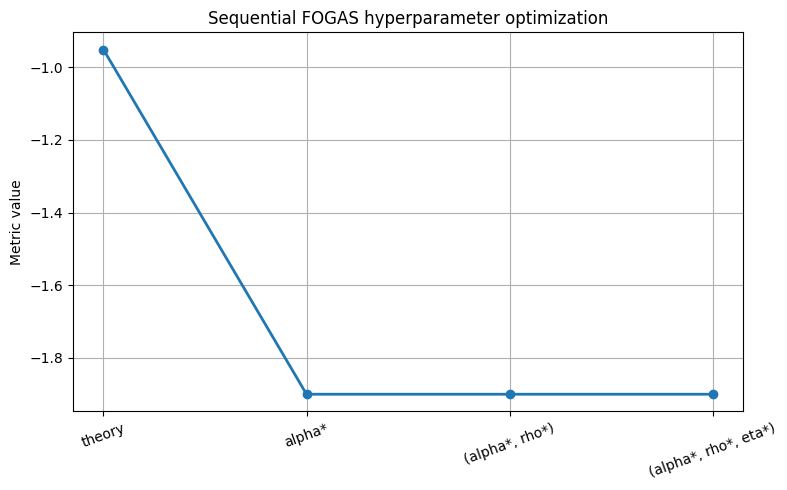

In [107]:
metrics = FOGASEvaluator(fog)

gap_metric = metrics.get_metric("reward")

optimizer = FOGASHyperOptimizer(
    solver=fog,
    metric_callable=gap_metric
)

summary = optimizer.optimize_fogas_hyperparameters(
    search_method="random",
    coarse_points=20,
    print_search=False,
    print_main=True, 
    num_runs=2
)

alpha_star = summary["alpha"]
rho_star = summary["rho"]
eta_star = summary["eta"]


In [ ]:
solver.run(alpha_star, eta_star, rho_star)

{'alpha': 3.853073558929235, 'rho': 1896.58627177177, 'eta': 0.00021516574145596766, 'metrics': {'theory': -0.9510292502799549, 'alpha': -1.8999930522106379, 'alpha_rho': -1.8999930530195357, 'alpha_rho_eta': -1.8999930530195357}}
